In [2]:
import neptune

ses = neptune.sessions.Session()
project = ses.get_project('jakub-czakon/ieee-fraud-detection')

In [4]:
BEST_EXP_ID = 'IEEEF-76'

best_exp = project.get_experiments(id=BEST_EXP_ID)[0]
best_exp

Experiment(IEEEF-76)

In [5]:
best_exp.get_properties()

{'train_features_data_path': '/home/kuba/projects/kaggle/kaggle-ieee-fraud-detection/data/features/train_features_v1.csv',
 'train_features_data_version': 'd5b59d9db058971fdbc14871e7ce43aa',
 'test_features_data_path': '/home/kuba/projects/kaggle/kaggle-ieee-fraud-detection/data/features/test_features_v1.csv',
 'test_features_data_version': 'e658c25e07042ea93d66fd20dda2cb5f'}

In [6]:
best_exp.get_parameters()

{'num_leaves': 256.0,
 'min_child_samples': 79.0,
 'objective': 'binary',
 'max_depth': 15.0,
 'learning_rate': 0.02,
 'boosting_type': 'gbdt',
 'subsample_freq': 3.0,
 'subsample': 0.9,
 'bagging_seed': 11.0,
 'metric': 'auc',
 'verbosity': -1.0,
 'reg_alpha': 0.3,
 'reg_lambda': 0.3,
 'colsample_bytree': 0.9,
 'seed': 1234.0,
 'nrows': 'None',
 'negative_sample_fraction': 1.0,
 'negative_sample_seed': 1234.0,
 'num_boosting_rounds': 200.0,
 'early_stopping_rounds': 20.0,
 'validation_schema': 'holdout',
 'validation_fraction': 0.26}

In [9]:
import joblib
best_exp.download_artifact('lightgbm.pkl' ,'/tmp/')
best_model = joblib.load('/tmp/lightgbm.pkl')
best_model

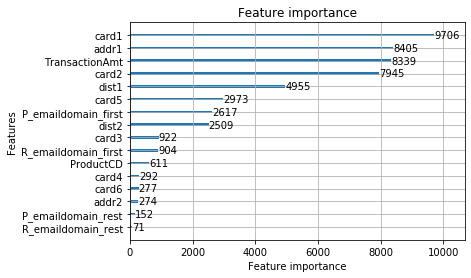

In [11]:
%matplotlib inline
from lightgbm.plotting import plot_importance

plot_importance(best_model)